In [ ]:
!nvidia-smi

Tue Jun 11 07:37:40 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA L4                      Off | 00000000:00:03.0 Off |                    0 |
| N/A   43C    P8              12W /  72W |      1MiB / 23034MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Setup complete ✅ (12 CPUs, 53.0 GB RAM, 30.2/201.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!yolo task=segment mode=predict model=yolov8x-seg.pt conf=0.25 source='/content/aircraft.jpg' save=true

100% 137M/137M [00:00<00:00, 330MB/s]
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
YOLOv8x-seg summary (fused): 295 layers, 71797696 parameters, 0 gradients, 344.1 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/aircraft.jpg: 384x640 1 airplane, 164.8ms
Speed: 15.7ms preprocess, 164.8ms inference, 731.8ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/segment/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


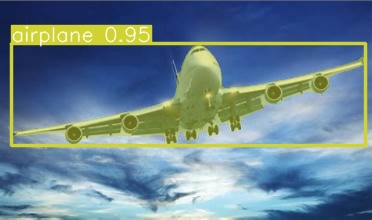

In [ ]:
Image(filename='runs/segment/predict/aircraft.jpg', height=600)

In [ ]:
model = YOLO('/content/yolov8x-seg.pt')
results = model.predict(source='/content/aircraft.jpg', conf=0.25)


WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/aircraft.jpg: 384x640 1 airplane, 171.9ms
Speed: 5.0ms preprocess, 171.9ms inference, 600.8ms postprocess per image at shape (1, 3, 384, 640)


In [ ]:
dataset = '/content/drive/MyDrive/project/Pneumonia Segmentation'
!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="my api key")
project = rf.workspace("school-mnoux").project("chest-imaging")
version = project.version(6)
dataset = version.download("yolov8")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 35.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.1 MB/s eta 0:00:00
Reason for being yanked: deprecated, use 4.8.0.76
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to chest-imaging-6 in yolov8:: 100%|██████████| 26074/26074 [00:03<00:00, 7759.53it/s]


Training Model

In [ ]:
!yolo task=segment mode=train model=yolov8x-seg.pt  data='/content/chest-imaging-6/data.yaml' epochs=6 imgsz=640 batch=-1

New https://pypi.org/project/ultralytics/8.2.31 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
engine/trainer: task=segment, mode=train, model=yolov8x-seg.pt, data=/content/chest-imaging-6/data.yaml, epochs=6, patience=50, batch=-1, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augme

In [ ]:
!ls content/runs/segment/train/

/bin/bash: line 1: cd: content/runs/segment/train/: No such file or directory


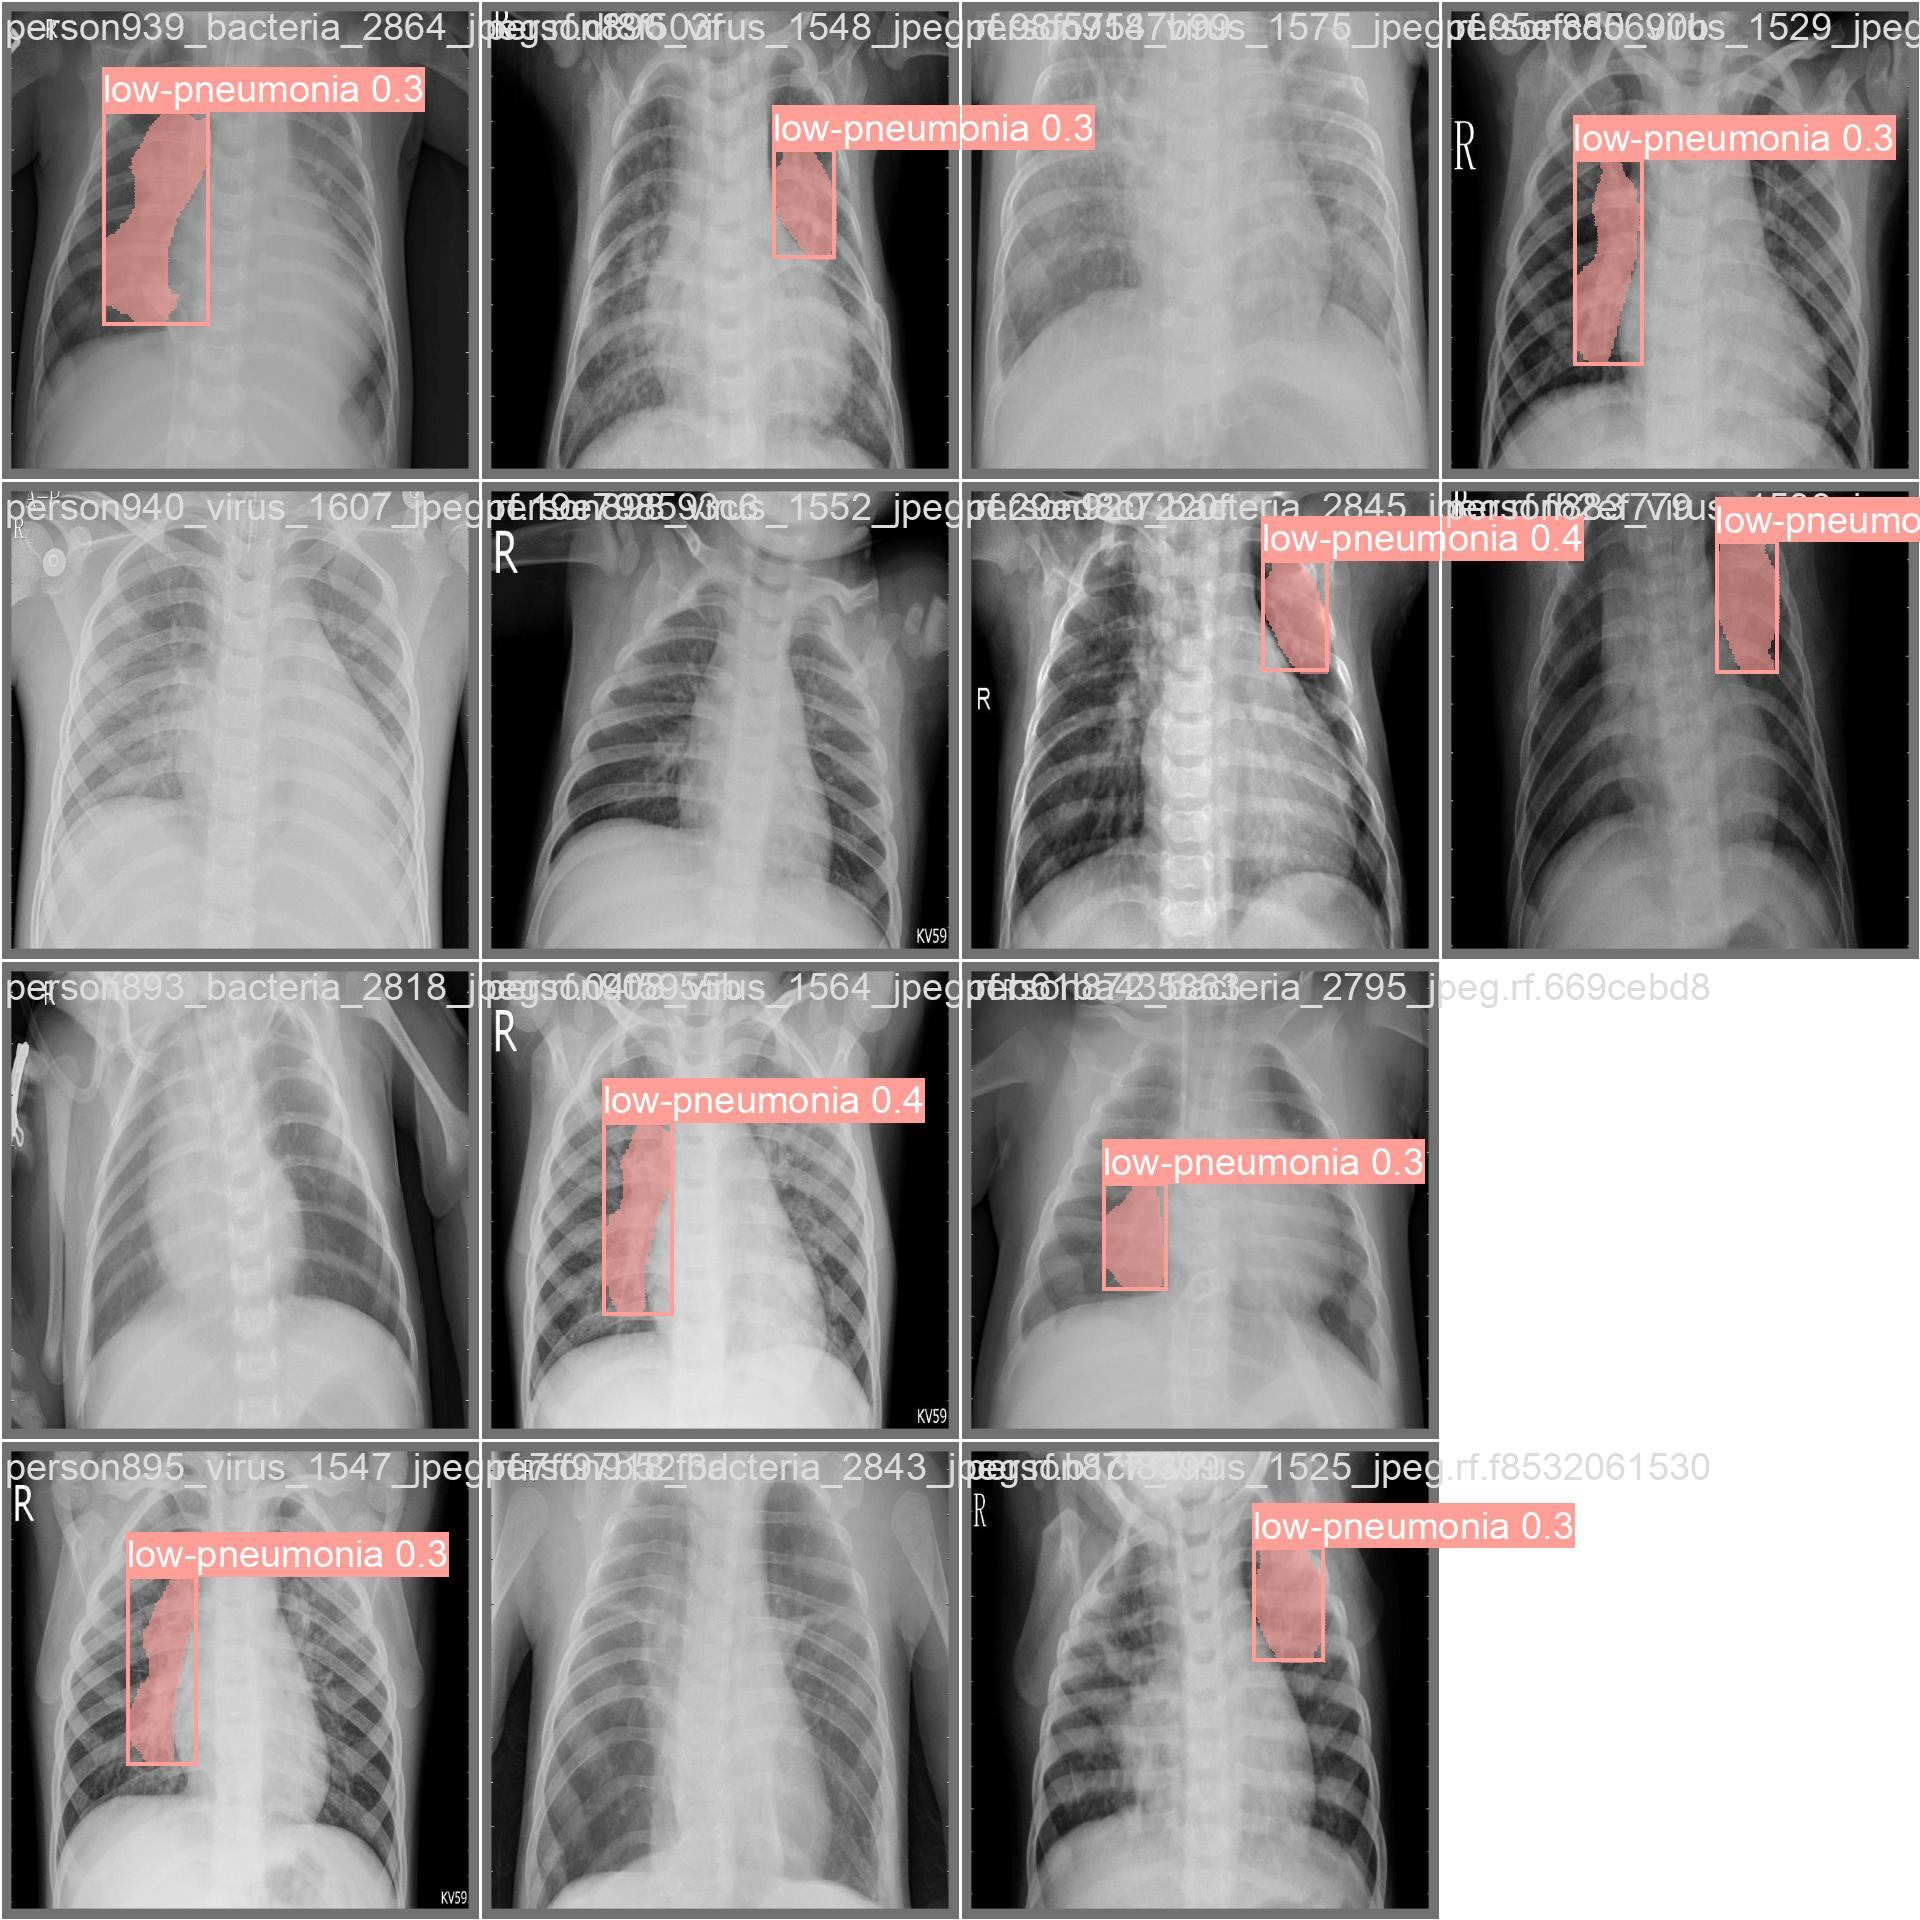

In [ ]:

Image(filename='/content/runs/segment/train/val_batch1_pred.jpg', width=600)

In [ ]:

!yolo task=segment mode=val model='/content/runs/segment/train/weights/best.pt' data={dataset.location}/data.yaml

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
YOLOv8x-seg summary (fused): 295 layers, 71723545 parameters, 0 gradients, 343.7 GFLOPs
val: Scanning /content/chest-imaging-6/valid/labels.cache... 1099 images, 3 backgrounds, 0 corrupt: 100% 1099/1099 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0% 0/69 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 69/69 [00:41<00:00,  1.66it/s]
    

In [ ]:

!yolo task=segment mode=predict model='/content/runs/segment/train/weights/best.pt' conf=0.25 source='/content/chest-imaging-6/test/images' save=true

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
YOLOv8x-seg summary (fused): 295 layers, 71723545 parameters, 0 gradients, 343.7 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/526 /content/chest-imaging-6/test/images/IM-0522-0001_jpeg.rf.b36b85eb1d7ae7340fabf4511b8bc25b.jpg: 640x640 2 no-pneumonias, 18.3ms
image 2/526 /content/chest-imaging-6/test/images/IM-0525-0001-0001_jpeg.rf.d00136b704cb184a0dab8d12826fc754.jpg: 640x640 2 no-pneumonias, 18.2ms
image 3/526 /content/chest-imaging-6/test/images/IM-0529-0001_jpeg.rf.4858c9eeb1ee8be0332fd441806d18e1.jpg: 640x640 2 no-pneumonias, 18.3ms
image 4/526 /content/chest-imaging-6/test/images/IM-0531-0001_jpeg.rf.08d3cc4426bfbf4ec6b583df33657709.jpg: 640x640 2 no-pneumonias, 18.4ms
image 5/526 /content/chest-imaging-6/test/images/IM-0533-0001-0001_jpeg.rf.9af283581d55e5d854052e2421eaca97.jpg: 640x640 2 no-pneumonias, 18.7ms
image 6/526 /content/chest-imaging-6/test/images/IM-0539-0001_jpeg.rf.

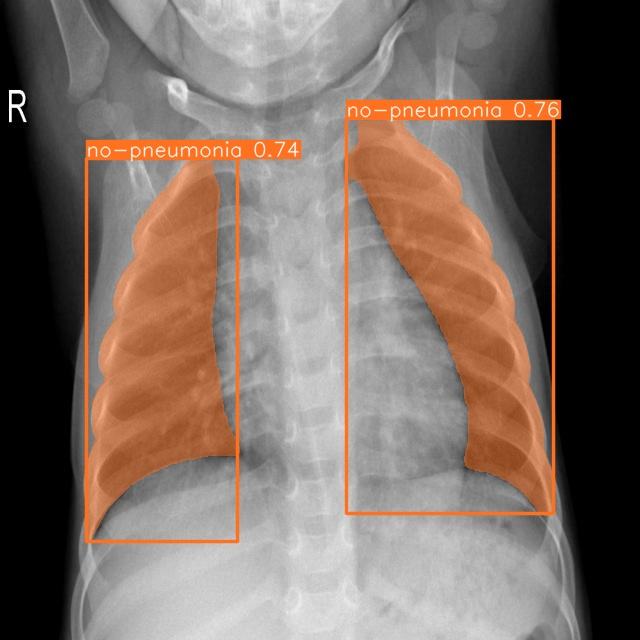

In [ ]:
Image(filename = "/content/runs/segment/predict2/IM-0522-0001_jpeg.rf.b36b85eb1d7ae7340fabf4511b8bc25b.jpg")

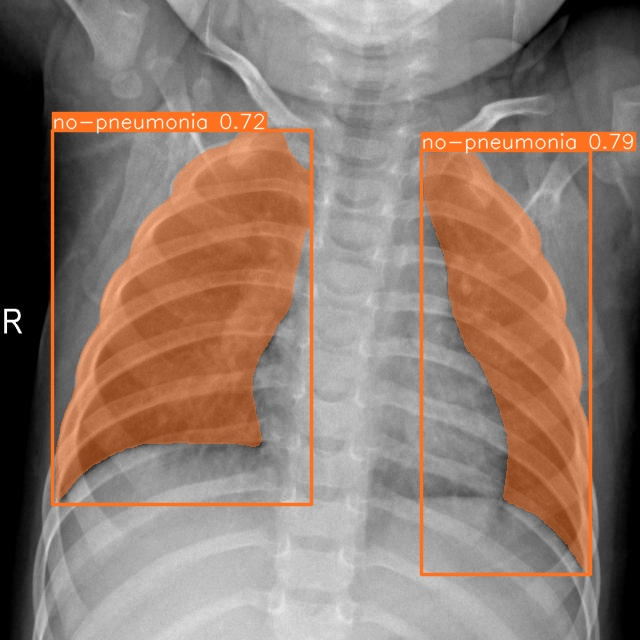

In [ ]:
Image(filename = "/content/runs/segment/predict2/NORMAL2-IM-0852-0001_jpeg.rf.b5a7583dcde2392185b1aa56c8e5a819.jpg")

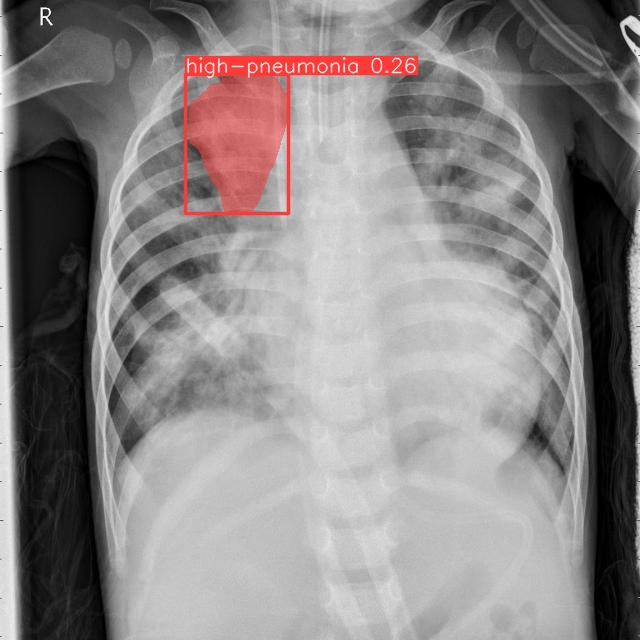

In [ ]:
Image(filename='/content/runs/segment/predict2/person986_bacteria_2913_jpeg.rf.1144d003650daba287780156e12ef8f5.jpg')